# Environment Setup


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [2]:
path_to_data = 'data.xls'
df = pd.read_excel(path_to_data)

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3323 non-null   object 
 1   year          3323 non-null   int64  
 2   price         3323 non-null   int64  
 3   miles_driven  3323 non-null   int64  
 4   Region        3323 non-null   object 
 5   fuel          3323 non-null   object 
 6   transmission  3323 non-null   object 
 7   mileage       3323 non-null   float64
 8   horse_power   3323 non-null   float64
 9   seats         3323 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 259.7+ KB


In [4]:
df.describe()

,year,price,miles_driven,mileage,horse_power,seats
count,3323.000000,3323.000000,3.323000e+03,3323.000000,3323.000000,3323.000000
mean,2014.190491,12115.888354,4.314015e+04,43.743896,106.387185,5.295516
std,3.440053,15203.179799,3.992027e+04,9.049754,41.932843,0.832404
min,1999.000000,600.000000,6.300000e+02,0.000000,55.200000,4.000000
25%,2012.000000,4047.000000,1.890000e+04,39.433000,78.900000,5.000000
50%,2015.000000,7333.000000,3.780000e+04,43.710000,94.930000,5.000000
75%,2017.000000,11333.000000,5.670000e+04,49.585000,123.700000,5.000000
max,2020.000000,133333.000000,1.487088e+06,98.700000,400.000000,10.000000


In [5]:
df

,name,year,price,miles_driven,Region,fuel,transmission,mileage,horse_power,seats
0,Audi,2010,9733,34650,West,Gasoline,Automatic,28.9050,163.20,5
1,Audi,2017,22533,5040,South,Gasoline,Automatic,39.0100,177.50,5
2,Audi,2014,21333,27720,South,Diesel,Automatic,38.8925,147.51,5
3,Audi,2017,34667,44100,Central,Diesel,Automatic,47.8930,143.00,5
4,Audi,2019,82973,4914,Central,Gasoline,Automatic,35.8610,187.74,5
...,...,...,...,...,...,...,...,...,...,...
3318,Volvo,2019,50667,12600,West,Diesel,Automatic,42.3000,190.00,5
3319,Volvo,2019,50667,12600,Central,Diesel,Automatic,42.3000,190.00,5
3320,Volvo,2019,73333,10710,South,Diesel,Automatic,42.3000,190.00,5
3321,Volvo,2018,73333,31500,Central,Diesel,Automatic,26.3200,235.00,5


## Visualizations

<AxesSubplot:title={'center':'Histogram of the "year" column'}>

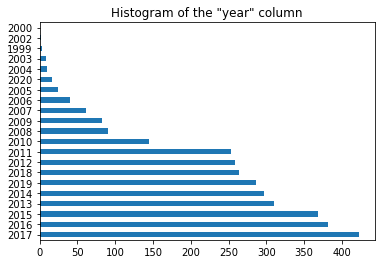

In [6]:
df.year.value_counts().plot.barh(title='Histogram of the "year" column')

<AxesSubplot:title={'center':'Bar plot of the "fuel" column'}>

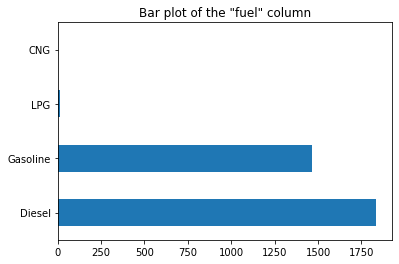

In [7]:
df.fuel.value_counts().plot.barh(title='Bar plot of the "fuel" column')

<AxesSubplot:title={'center':'Bar plot of the "Region" column'}>

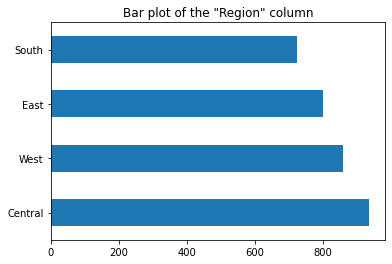

In [8]:
df.Region.value_counts().plot.barh(title='Bar plot of the "Region" column')

<AxesSubplot:title={'center':'Histogram of the "name" column'}>

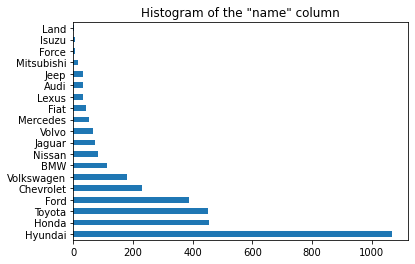

In [9]:
df.name.value_counts().plot.barh(title='Histogram of the "name" column')

<AxesSubplot:title={'center':'Box plot of the "price" column'}>

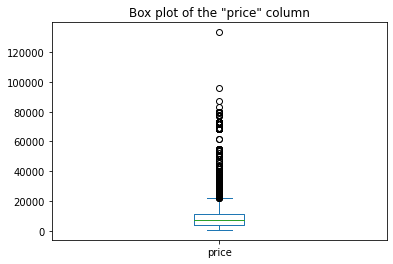

In [10]:
# it seems that we have a lot of outliers in the data
df.price.plot.box(title='Box plot of the "price" column')

No handles with labels found to put in legend.


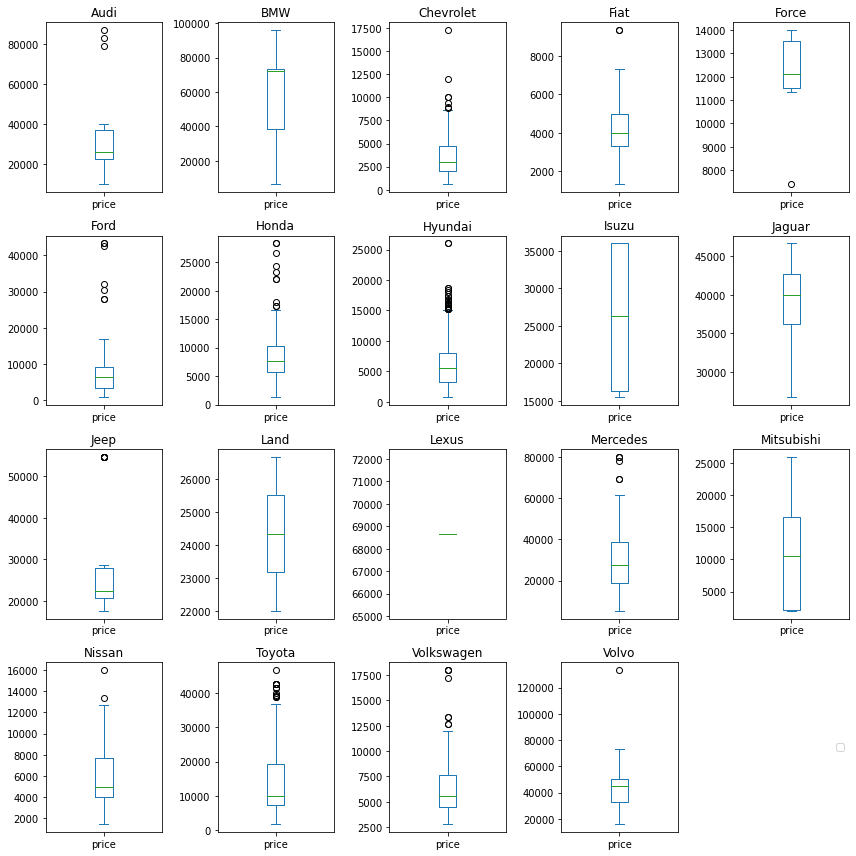

In [11]:
# box plot for price per unique name
names = df['name'].unique()
fig, axes = plt.subplots(4, 5, figsize=(12, 12))
for ax in axes.flat:
    ax.axis('off')

for name, ax in zip(names, axes.flat):
    ax.axis('on')
    df[df['name']==name].price.plot.box(title=name, ax=ax)

plt.legend(loc='right')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Scatter plot of the "milage" as X and "price" as Y'}, xlabel='mileage', ylabel='price'>

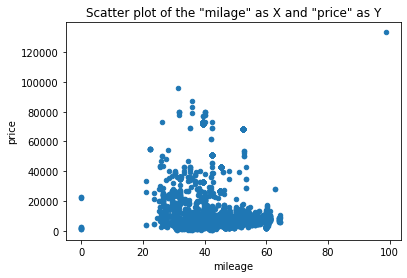

In [12]:
df.plot.scatter(x='mileage', y='price', title='Scatter plot of the "milage" as X and "price" as Y')

<AxesSubplot:title={'center':'Scatter plot of the "miles_driven" as X and "price" as Y'}, xlabel='miles_driven', ylabel='price'>

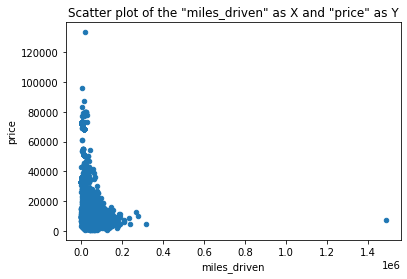

In [13]:
df.plot.scatter(x='miles_driven', y='price', title='Scatter plot of the "miles_driven" as X and "price" as Y')

<AxesSubplot:title={'center':'Scatter plot of the "horse_power" as X and "price" as Y'}, xlabel='horse_power', ylabel='price'>

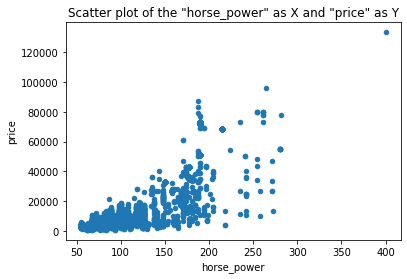

In [14]:
df.plot.scatter(x='horse_power', y='price', title='Scatter plot of the "horse_power" as X and "price" as Y')

<AxesSubplot:title={'center':'Line plot of the "miles_driven" as X and "price" as Y'}, xlabel='miles_driven'>

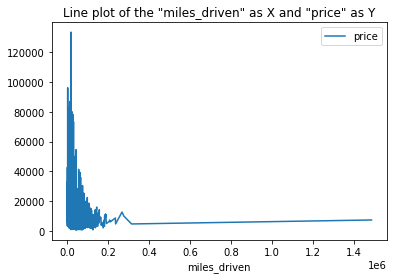

In [15]:
df.sort_values(by=['miles_driven']).plot.line(x='miles_driven', y='price', title='Line plot of the "miles_driven" as X and "price" as Y')

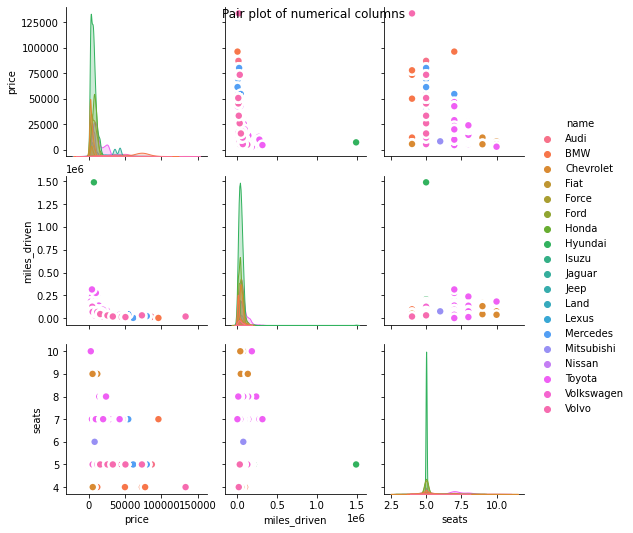

In [16]:
columns_to_inspect = ['name', 'price', 'miles_driven', 'seats']
g = sns.pairplot(
    df[columns_to_inspect], 
    kind="scatter",
     hue="name", 
    plot_kws=dict(
        s=80, 
        edgecolor="white", 
        linewidth=2.5
    ), 
)
g.fig.suptitle('Pair plot of numerical columns')
# plt.tight_layout()
plt.show()

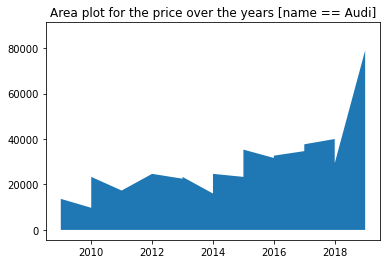

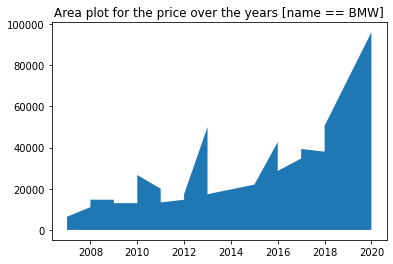

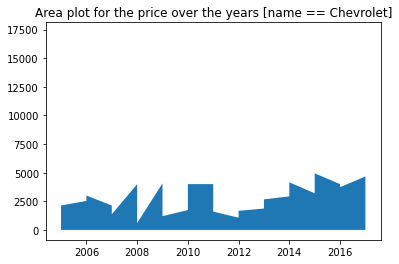

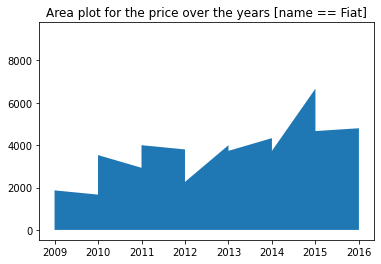

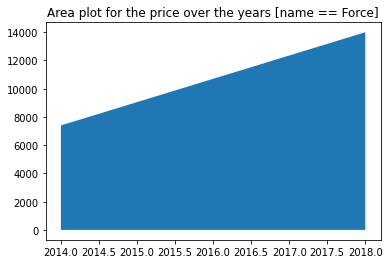

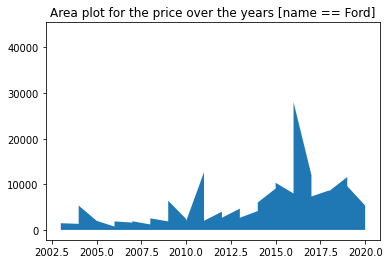

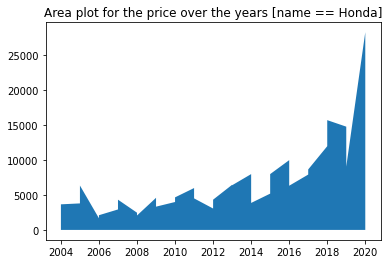

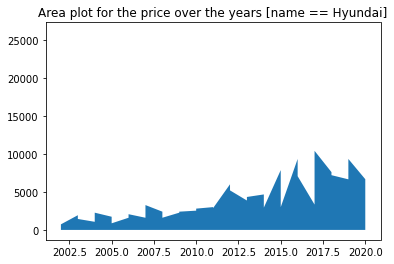

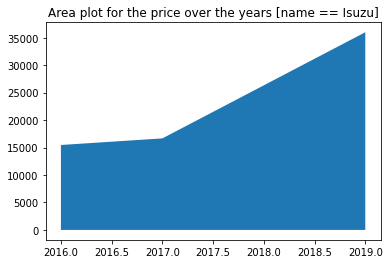

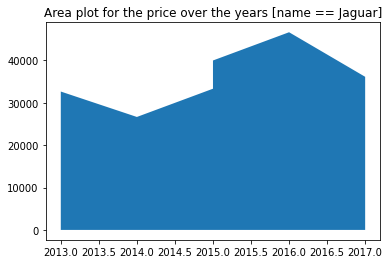

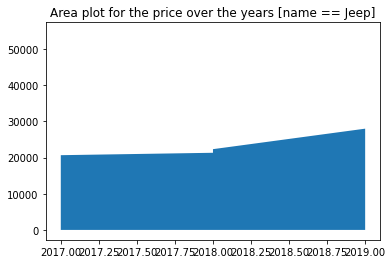

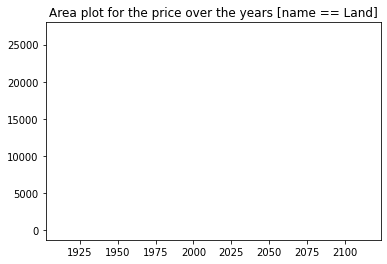

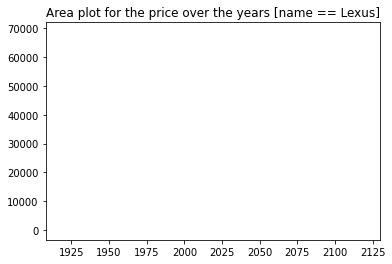

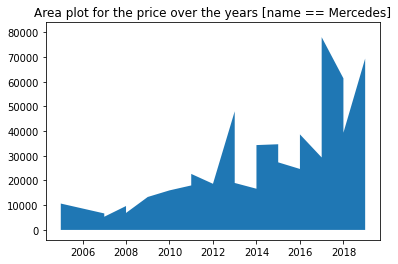

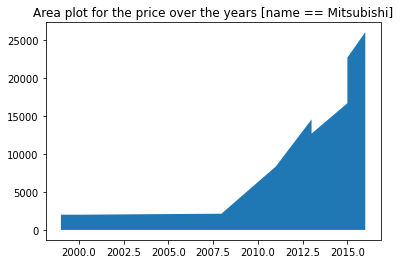

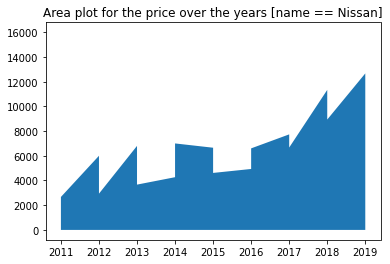

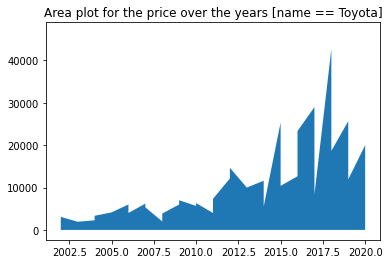

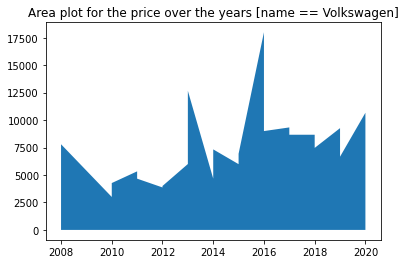

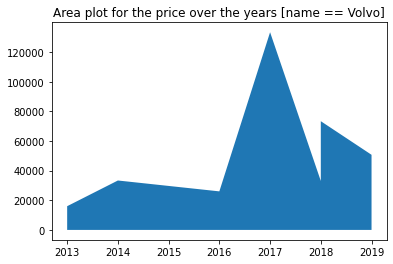

In [17]:
# Area plot
sorted_df = df.sort_values(by='year')

for name in df.name.unique():
    plt.fill_between(sorted_df[sorted_df.name==name].year, sorted_df[sorted_df.name==name].price)
    plt.title(f"Area plot for the price over the years [name == {name}]")
    plt.show()

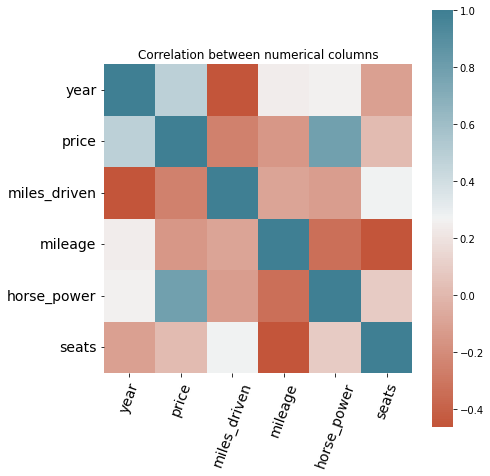

In [18]:
# Correlation between numerical columns
columns_to_inspect = ['price', 'miles_driven', 'seats', 'hourse_power', 'milage']

fig = plt.figure(figsize=(7, 7))

ax = sns.heatmap(df.corr(), square=True, cmap=sns.diverging_palette(20, 220, n=200))
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=360, fontsize=14)

plt.title("Correlation between numerical columns")
plt.tight_layout()
plt.show()

We can see that there's a positive correlation between:
   - price and hourse_power (strong correlation)
   - price and year (medium correlation)

Also, there's a negative correlation between:
   - price and miles_driven (strong correlation)
   - price and milage 
   - price and seats

so the hourse_power, the year, and the miles_driven are good predictors for the price